# Bài tập 1 - (1+1)-EA and (1+λ)-EA on OneMax and LeadingOnes
Trong bài tập này chúng ta sẽ khảo sát bằng thực nghiệm hiệu năng của 2 thuật toán (1+1)-EA và (1+λ)-EA trên 2 bài toán OneMax và LeadingOnes. Các yêu cầu cụ thể của bài tập này như sau:

1. Các bạn tạo 1 file ipynb mới và lập trình lại 2 thuật toán (1+1)-EA và (1+λ)-EA đã học trong Bài 1. Các bạn có thể sử dụng bản cài đặt có sẵn trong slides hoặc tự cài đặt lại.
2. Đối với cả 2 bài toán OneMax và LeadingOnes, chúng ta giới hạn kích thước bài toán (problem size) n = 20. Tức là lời giải tối ưu của cả 2 bài toán này là chuỗi có 20 bit 1.
3. Đối với mỗi thuật toán và với mỗi bài toán, các bạn cần tìm ra cần bao nhiêu thế hệ (the number of generations) để thuật toán tìm ra được lời giải tối ưu một cách ổn định. Vì các thuật toán có yếu tố ngẫu nhiên nên các bạn cần chạy mỗi thực nghiệm 10 lần (như trong slides Bài 1) để kiểm tra xem có phải thuật toán tìm ra lời giải tối ưu trong đa số các lần chạy hay không (ví dụ 7/10 lần chạy thành công).
4. Hãy vẽ đồ thị hội tụ với đường trung bình và độ lệch chuẩn tính trên 10 lần chạy (như trong slides Bài 1). Lưu ý, đồ thị hội tụ cần có trục x được biểu diễn là số lần gọi hàm đánh giá (the number of evaluations).
5. Lưu ý: Giới hạn số lần gọi hàm đánh giá là 100.000 (maximal number of evaluations). Tức là khi thuật toán gọi hết 100.000 lần gọi hàm đánh giá thì thuật toán dừng lại.
6. Đối với  (1+λ)-EA, các bạn hãy thực nghiệm với λ = 2, 4, 8, 16, 32, 64, 128, ... cho tới khi nào tìm ra giá trị λ bé nhất có thể tìm ra lời giải tối ưu một cách ổn định.

Nộp file ipynb có dạng BT1_MSSV.ipynb với MSSV là mã số học viên của các bạn. Trong file nộp cần chứa:
* Source code.
* Đồ thị hội tụ kết quả của OneMax và LeadingOnes.
* Nhận xét về hiệu năng của (1+1)-EA and (1+λ)-EA khi giải quyết OneMax và LeadingOnes.

In [1]:
n_trials = 10
n = 20
max_evaluations = 100000

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
from tqdm import tqdm
np.random.seed(1234)

In [3]:
class Individual:
  def __init__(self, n: int):
    self.genes = np.random.randint(0, 2, (n,))
    self.fitness = -np.inf
  def __str__(self):
    return f'(Ind: {self.genes}, {self.fitness})'
  def __repr__(self):
    return str(self)

In [4]:
def onemax(i: Individual):
  return np.sum(i.genes)


In [5]:
def leading_ones(ind: Individual):
  f = 0
  for i in range(len(ind.genes)):
    if not ind.genes[i]:
      f = i
      break
  return f


In [6]:
def evaluate(ind: Individual, objective):
  ind.fitness = objective(ind)


In [7]:
def mutate(ind: Individual, mutation_rate=1.0/10):
  new_genes = np.copy(ind.genes)
  for i in range(len(new_genes)):
    if np.random.rand() < mutation_rate:
      new_genes[i] = not ind.genes[i]
  child = Individual(len(ind.genes))
  child.genes = new_genes
  return child


In [8]:
def one_plus_one(ind_length: int, num_generations: int, objective):
  fits = np.zeros(num_generations)
  parent = Individual(ind_length)
  evaluate(parent, objective)
  for i in tqdm(range(len(fits))):
    child = mutate(parent)
    evaluate(child, objective)
    if child.fitness >= parent.fitness:
      parent = child
    fits[i] = parent.fitness
  return fits

In [9]:
def one_plus_lambda(ind_length: int, num_generations: int, objective, 𝜆: int):
    fits = np.zeros(num_generations)
    parent = Individual(ind_length)
    evaluate(parent, objective)

    for i in tqdm(range(len(fits))):
        population = [parent,]
        best = 0
        for j in range(1, 𝜆):
            population.append(mutate(parent))
            evaluate(population[j], objective)
            if population[j].fitness > population[best].fitness:
                best = j
        if population[best].fitness >= parent.fitness:
            parent = population[best]
        fits[i] = parent.fitness
    return fits

# 1. Thuật toán (1+1)-EA.

## 1.1. Thuật toán (1+1)-EA giải quyết bài toán OneMax

In [108]:
# khởi tạo để lưu trữ về số thế hệ để thuật toán tìm được lời giải tối ưu cho n trials
n_gen_onemax_collection = np.zeros(n_trials)
fits_1_onemax_collection = np.zeros((max_evaluations, n_trials))

for i in range(n_trials):
  fitness = one_plus_one(n, max_evaluations, onemax)
  fits_1_onemax_collection[:, i] = fitness
  max_fitness = np.max(fitness)
  if max_fitness == n:
    num_gen_with_max_fitness = np.where(fitness == max_fitness)[0][0]
    n_gen_onemax_collection[i] = num_gen_with_max_fitness

print(f'Số thế hệ tối ưu cho mỗi trials: {n_gen_onemax_collection}')
print(f'Số trial tìm được lời giải tối ưu: {sum(x > 0 for x in n_gen_onemax_collection)}/{n_trials}')

100%|██████████| 100000/100000 [00:05<00:00, 18897.36it/s]

Số thế hệ tối ưu cho mỗi trials: [135. 160. 155. 196.  87.  50. 133. 282. 249. 233.]
Số trial tìm được lời giải tối ưu: 10/10


### **Kết quả trên cho thấy khi sử dụng thuật toán (1+1) EA để giải bài toán One-Max thì đều tìm được lời giải tối ưu trong hầu hết các thử nghiệm.**

## 1.2. Thuật toán (1+1)-EA giải quyết bài toán Leading-One

In [45]:
# khởi tạo để lưu trữ về số thế hệ để thuật toán tìm được lời giải tối ưu cho n trials
n_gen_leading_one_collection = np.zeros(n_trials)
fits_1_leadingOne_collection = np.zeros((max_evaluations, n_trials))
for i in range(n_trials):
  fitness = one_plus_one(n, max_evaluations, leading_ones)
  fits_1_leadingOne_collection[:, i] = fitness
  max_fitness = np.max(fitness)
  if max_fitness == n:
    num_gen_with_max_fitness = np.where(fitness == max_fitness)[0][0]
    n_gen_leading_one_collection[i] = num_gen_with_max_fitness

print(f'Số thế hệ mà bài toán là lời giải tối ưu cho mỗi trials: {n_gen_leading_one_collection}')
print(f'Số trial tìm được lời giải tối ưu: {sum(x > 0 for x in n_gen_leading_one_collection)}')

100%|██████████| 100000/100000 [00:02<00:00, 33763.78it/s]

Số thế hệ mà bài toán là lời giải tối ưu cho mỗi trials: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Số trial tìm được lời giải tối ưu: 0


### **Kết quả trên cho thấy khi sử dụng thuật toán (1+1) EA để giải bài toán Leading-Ones thì đều** ***KHÔNG*** **tìm được lời giải tối ưu trong hầu hết các thử nghiệm.**

## Đồ thị kết quả hội tụ của One-Max và Leading-One với thuật toán (1+1) EA


(0.0, 1000.0)

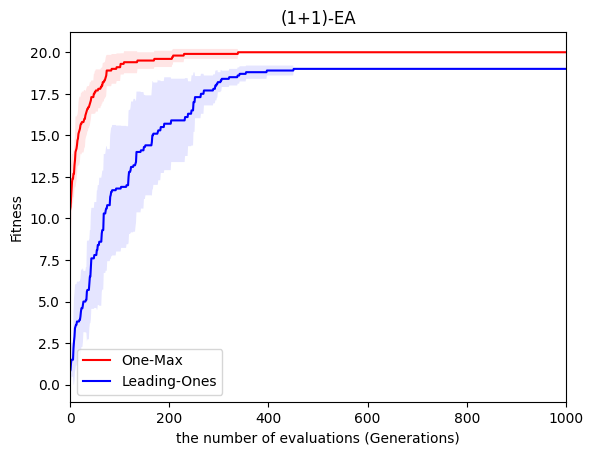

In [95]:
μ_1_oneMax = np.mean(fits_1_onemax_collection, axis=1)
σ_1_oneMax = np.std(fits_1_onemax_collection, axis=1)
μ_1_leadingOne = np.mean(fits_1_leadingOne_collection, axis=1)
σ_1_leadingOne = np.std(fits_1_leadingOne_collection, axis=1)

plt.plot(μ_1_oneMax, label='One-Max', color='r')
plt.fill_between(np.arange(0, max_evaluations), μ_1_oneMax + σ_1_oneMax, μ_1_oneMax - σ_1_oneMax, facecolor='r', alpha=0.1)

plt.plot(μ_1_leadingOne, label='Leading-Ones', color='b')
plt.fill_between(np.arange(0, max_evaluations), μ_1_leadingOne + σ_1_leadingOne, μ_1_leadingOne - σ_1_leadingOne, facecolor='b', alpha=0.1)

plt.xlabel("the number of evaluations (Generations)")
plt.ylabel("Fitness")
plt.title("(1+1)-EA")
plt.legend();
plt.xlim(0, 1000)

## Nhận xét về đồ thị khi sử dụng thuật toán (1+1) EA để giải quyết bài toán One-Max và bài toán Leading-One

# 2.1. Thuật toán (1+𝜆)-EA.

## 2.1. Thuật toán (1+𝜆)-EA giải quyết bài toán OneMax

In [96]:
λ_values = [2, 4, 8, 16, 32, 64, 128, 256, 512]

100%|██████████| 195/195 [00:03<00:00, 55.21it/s]


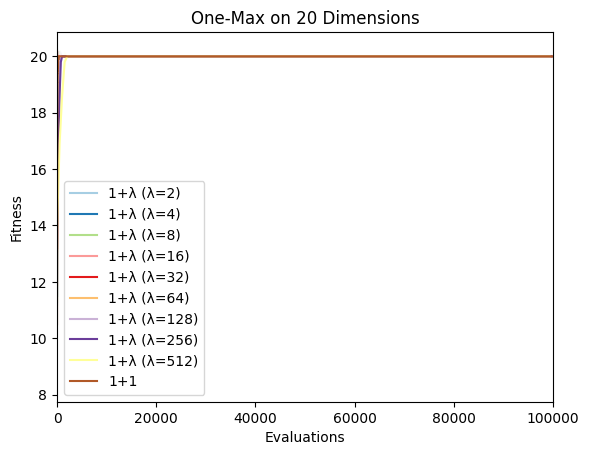

In [104]:
# Sử dụng colormap cho các giá trị 𝜆
colormap = plt.cm.get_cmap('Paired', len(λ_values) + 1)

μ_𝜆_onemax_collection = []
σ_𝜆_onemax_collection = []
for i, λ in enumerate(λ_values):
  n_gens = int(max_evaluations/λ)
  fits_𝜆_onemax_collection = np.zeros((n_gens, n_trials))
  for j in range(n_trials):
    fits = one_plus_lambda(n, n_gens, onemax, λ)
    fits_𝜆_onemax_collection[:, j] = fits
  μ_𝜆_onemax = np.mean(fits_𝜆_onemax_collection, axis=1)
  σ_𝜆_onemax = np.std(fits_𝜆_onemax_collection, axis=1)

  μ_𝜆_onemax_collection.append([λ, μ_𝜆_onemax])
  σ_𝜆_onemax_collection.append([λ, σ_𝜆_onemax])

  color = colormap(i)  # Sử dụng colormap để lấy màu sắc cho biểu đồ
  label = f"1+λ (λ={λ})"
  plt.plot(np.arange(0, n_gens*λ, λ), μ_𝜆_onemax, label=label, color=color)
  plt.fill_between(np.arange(0, n_gens*λ, λ), μ_𝜆_onemax + σ_𝜆_onemax, μ_𝜆_onemax - σ_𝜆_onemax, facecolor=color, alpha=0.1)

plt.plot(μ_1_oneMax, label="1+1", color=colormap(len(λ_values) + 1))
plt.fill_between(np.arange(0, max_evaluations), μ_1_oneMax + σ_1_oneMax, μ_1_oneMax - σ_1_oneMax, facecolor='r', alpha=0.1)
plt.xlim(0, 100000)
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions")
plt.legend()
# Gán biểu đồ vào biến "onemax_result"
lambda_funding_onemax = plt.gcf()

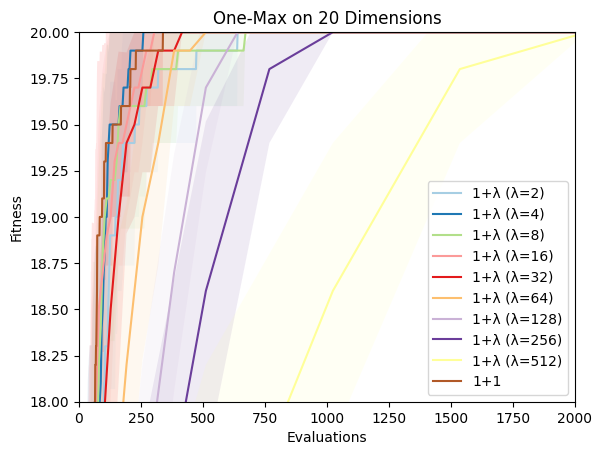

In [105]:
lambda_funding_onemax.gca().set_xlim(0, 2000)
lambda_funding_onemax.gca().set_ylim(18, 20)
lambda_funding_onemax.gca().set_xlabel("Evaluations")
lambda_funding_onemax.gca().set_ylabel("Fitness")
lambda_funding_onemax.gca().set_title(f"One-Max on {n} Dimensions")
lambda_funding_onemax.gca().legend()
lambda_funding_onemax

### **Kết quả cho thấy đối với bài toán One-Max thì λ = 4 là giá trị λ bé nhất để tìm ra lời giải tối ưu một cách ổn định.**

**So sánh (1+1)-EA and (1+λ)-EA khi giải quyết OneMax**
 - Kết quả cho thấy nếu dựa vào số lần gọi hàm đánh giá làm tiêu chí xem xét thì hiệu năng của thuật toán (1+1)-EA and (1+λ)-EA với λ nhỏ (< 64) là tương đương nhau còn với λ lớn (> 64) thì thuật toán (1+1) -EA hoạt động tốt hơn tìm thấy lời giải tối ưu sớm hơn.

## 2.2. Thuật toán (1+𝜆)-EA giải quyết bài toán Leading-One

100%|██████████| 195/195 [00:02<00:00, 65.05it/s]


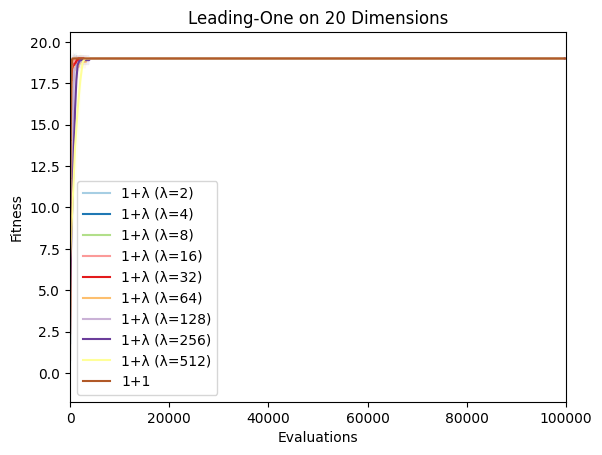

In [106]:
μ_𝜆_leadingOnes_collection = []
σ_𝜆_leadingOnes_collection = []

for i, λ in enumerate(λ_values):
  n_gens = int(max_evaluations/λ)
  fits_𝜆_leadingOne_collection = np.zeros((n_gens, n_trials))
  for j in range(n_trials):
    fits_𝜆_leadingOne_collection[:, j] = one_plus_lambda(n, n_gens, leading_ones, λ)
  μ_𝜆_leadingOne = np.mean(fits_𝜆_leadingOne_collection, axis=1)
  σ_𝜆_leadingOne = np.std(fits_𝜆_leadingOne_collection, axis=1)

  μ_𝜆_leadingOnes_collection.append([𝜆, μ_𝜆_leadingOne])
  σ_𝜆_leadingOnes_collection.append([𝜆, σ_𝜆_leadingOne])

  color = colormap(i)  # Sử dụng colormap để lấy màu sắc cho biểu đồ
  label = f"1+λ (λ={λ})"
  plt.plot(np.arange(0, n_gens*λ, λ), μ_𝜆_leadingOne, label=label, color=color)
  plt.fill_between(np.arange(0, n_gens*λ, λ), μ_𝜆_leadingOne + σ_𝜆_leadingOne, μ_𝜆_leadingOne - σ_𝜆_leadingOne, facecolor=color, alpha=0.1)

plt.plot(μ_1_leadingOne, label="1+1", color=colormap(len(λ_values) + 1))
plt.fill_between(np.arange(0, max_evaluations), μ_1_leadingOne + σ_1_leadingOne, μ_1_leadingOne - σ_1_leadingOne, facecolor='b', alpha=0.1)
plt.xlim(0, 100000)
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"Leading-One on {n} Dimensions")
plt.legend()
# Gán biểu đồ vào biến "leadingOnes_result"
lambda_funding_leadingOnes = plt.gcf()

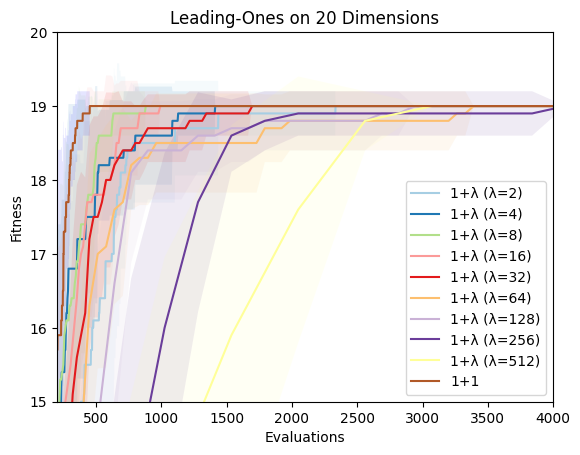

In [107]:
lambda_funding_leadingOnes.gca().set_xlim(200, 4000)
lambda_funding_leadingOnes.gca().set_ylim(15,20)
lambda_funding_leadingOnes.gca().set_xlabel("Evaluations")
lambda_funding_leadingOnes.gca().set_ylabel("Fitness")
lambda_funding_leadingOnes.gca().set_title(f"Leading-Ones on {n} Dimensions")
lambda_funding_leadingOnes.gca().legend()
lambda_funding_leadingOnes

**Kết quả cho thấy đối với bài toán Leading-Ones thì λ = 8 là giá trị λ bé nhất để tìm ra lời giải tối ưu một cách ổn định.**

**So sánh (1+1)-EA and (1+λ)-EA khi giải quyết LeadingOnes**
 - Kết quả cho thấy cả thuật toán (1+1)-EA and (1+λ)-EA đều hiếm khi tìm được lời giải tối ưu cho bài toán leading-one.
 - Nếu dựa vào số lần gọi hàm đánh giá làm tiêu chí xem xét thì hiệu năng của thuật toán (1+1)-EA cho kết quả tốt hơn (1+λ)-EA giúp tìm được lời giải tốt sớm hơn trong tất cả các trường hợp khác nhau của λ.  